In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

from scipy import stats

In [2]:
# identify and change directory
new_dir = 'Z:/Desktop/AS_Matlab/';
os.chdir(new_dir)

In [3]:
# read datatframe
FCO2_filled_JAK = pd.read_csv('CO2_filled_daily_random_forest.csv',sep=';')
# FCO2_filled_JAK['co2_flux_gapfilled'] = FCO2_filled_JAK['co2_flux_gapfilled']*3600*24*44/1000000
# create dataframe from file
dataframe = pd.DataFrame(FCO2_filled_JAK)
print(FCO2_filled_JAK)
# FCO2_filled_JAK['co2_flux_gapfilled'] = FCO2_filled_JAK['co2_flux_gapfilled']*3600*24*44/1000000 # CO2
FCO2_filled_JAK['co2_flux_gapfilled'] = FCO2_filled_JAK['co2_flux_gapfilled']*3600*24*12/1000000 # CARBON
print(FCO2_filled_JAK)

             Time  co2_flux_gapfilled
0     01-Jan-2012            0.871997
1     02-Jan-2012            0.870393
2     03-Jan-2012            0.863786
3     04-Jan-2012            1.005523
4     05-Jan-2012            1.046436
...           ...                 ...
3283  27-Dec-2020            0.536437
3284  28-Dec-2020            0.531610
3285  29-Dec-2020            0.500630
3286  30-Dec-2020            0.462055
3287  31-Dec-2020            0.415828

[3288 rows x 2 columns]
             Time  co2_flux_gapfilled
0     01-Jan-2012            0.904086
1     02-Jan-2012            0.902424
2     03-Jan-2012            0.895573
3     04-Jan-2012            1.042526
4     05-Jan-2012            1.084945
...           ...                 ...
3283  27-Dec-2020            0.556178
3284  28-Dec-2020            0.551173
3285  29-Dec-2020            0.519053
3286  30-Dec-2020            0.479059
3287  31-Dec-2020            0.431130

[3288 rows x 2 columns]


In [4]:
# convert time from series to datetime
FCO2_filled_JAK['Time'] = pd.to_datetime(FCO2_filled_JAK['Time'])
# FCO2_filled_JAK['co2_flux_gapfilled'] = FCO2_filled_JAK['co2_flux_gapfilled']*3600*24*44/1000000
print(FCO2_filled_JAK)

           Time  co2_flux_gapfilled
0    2012-01-01            0.904086
1    2012-01-02            0.902424
2    2012-01-03            0.895573
3    2012-01-04            1.042526
4    2012-01-05            1.084945
...         ...                 ...
3283 2020-12-27            0.556178
3284 2020-12-28            0.551173
3285 2020-12-29            0.519053
3286 2020-12-30            0.479059
3287 2020-12-31            0.431130

[3288 rows x 2 columns]


In [5]:
# read turnover dates
turnover_periods = pd.read_csv('Turnover_dates.csv',sep=';',names=["Year","Month","Day","Hour","Minute"],na_values=['','','NaN'])
turnover_periods['datetime'] = pd.to_datetime(turnover_periods[['Year','Month','Day','Hour','Minute']])
turnover_periods = turnover_periods[['datetime']]
# print(FCO2_filled.columns)

C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [6]:
df_overturn_FCO2 = pd.DataFrame()
df_overturn_time = pd.DataFrame()

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        overturn_FCO2 = FCO2_filled_JAK[(FCO2_filled_JAK['Time'] >= start_period) & (FCO2_filled_JAK['Time'] <= end_period)]['co2_flux_gapfilled']
        overturn_FCO2_df = overturn_FCO2.reset_index(drop=True).to_frame()
        df_overturn_FCO2 = pd.concat([df_overturn_FCO2, overturn_FCO2_df], ignore_index=True)

        overturn_time = FCO2_filled_JAK[(FCO2_filled_JAK['Time'] >= start_period) & (FCO2_filled_JAK['Time'] <= end_period)]['Time']
        overturn_time_df = overturn_time.reset_index(drop=True).to_frame()
        df_overturn_time = pd.concat([df_overturn_time, overturn_time_df], ignore_index=True)


print(FCO2_filled_JAK)

           Time  co2_flux_gapfilled
0    2012-01-01            0.904086
1    2012-01-02            0.902424
2    2012-01-03            0.895573
3    2012-01-04            1.042526
4    2012-01-05            1.084945
...         ...                 ...
3283 2020-12-27            0.556178
3284 2020-12-28            0.551173
3285 2020-12-29            0.519053
3286 2020-12-30            0.479059
3287 2020-12-31            0.431130

[3288 rows x 2 columns]


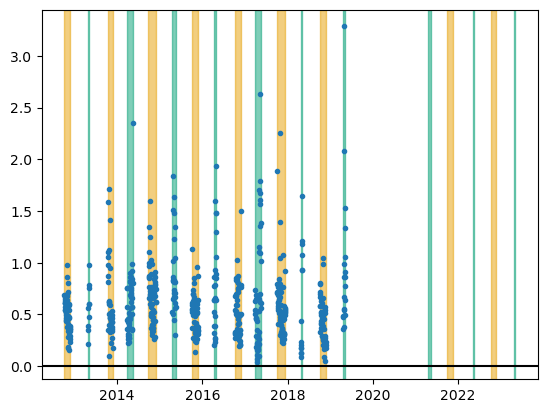

In [7]:
# plot timeseries
plt.plot(df_overturn_time,df_overturn_FCO2,'.')
# plot horizontal line
plt.axhline(y=0, color='k')
colors = ["#e69f00","#009e73"]

for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

In [8]:
FCO2_filled_JAK['Time'] = pd.to_datetime(FCO2_filled_JAK['Time'])
FCO2_filled_JAK.set_index('Time', inplace=True)
print(FCO2_filled_JAK)
annual_sum_FCO2 = FCO2_filled_JAK.resample('Y').sum()
# annual_sum_FCO2 = annual_sum_FCO2.where(annual_sum_FCO2.notna(), np.nan)
# annual_sum_FCO2 = pd.concat([annual_sum_FCO2.iloc[:1], new_row, annual_sum_FCO2.iloc[1:]], ignore_index=True)

print(annual_sum_FCO2)

            co2_flux_gapfilled
Time                          
2012-01-01            0.904086
2012-01-02            0.902424
2012-01-03            0.895573
2012-01-04            1.042526
2012-01-05            1.084945
...                        ...
2020-12-27            0.556178
2020-12-28            0.551173
2020-12-29            0.519053
2020-12-30            0.479059
2020-12-31            0.431130

[3288 rows x 1 columns]
            co2_flux_gapfilled
Time                          
2012-12-31          289.969076
2013-12-31          210.505438
2014-12-31          259.581649
2015-12-31          209.053908
2016-12-31          253.460507
2017-12-31          274.148954
2018-12-31          284.776274
2019-12-31          233.442556
2020-12-31          229.175420


In [9]:
# fluxes during SPRING periods
# FCO2_filled.set_index('Time', inplace=True)

spring_periods = {
    2010: (None,None),
    2011: (None,None),
    2012: (None,None),
    2013: ('2013-04-27', '2013-05-07'),
    2014: ('2014-03-26', '2014-05-15'),
    2015: ('2015-04-20', '2015-05-17'),
    2016: ('2016-04-07', '2016-05-01'),
    2017: ('2017-03-29', '2017-05-18'),
    2018: ('2018-04-23', '2018-05-06'),
    2019: ('2019-04-23', '2019-05-11'),
    2020: (None,None),
    2021: ('2021-04-20', '2021-05-11'),
    2022: ('2022-05-07', '2022-05-18'),
    2023: ('2023-04-21', '2023-05-06'),
}

annual_spring_FCO2 = {}
for year, (start, end) in spring_periods.items():
    if start is not None and end is not None:  # Check for valid start and end dates
        # Convert to datetime if they are strings
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        
        # Filter the DataFrame for the spring period
        spring_data = FCO2_filled_JAK.loc[start_date:end_date]
        
        # Calculate the sum for that period
        annual_spring_FCO2[year] = spring_data['co2_flux_gapfilled'].sum()
    else:
        # Set the sum to None for years with no valid dates
        annual_spring_FCO2[year] = None
        
annual_spring_df = pd.DataFrame(list(annual_spring_FCO2.items()), columns=['Year', 'Spring Sum'])
annual_spring_FCO2 = pd.Series(annual_spring_FCO2)
# annual_spring_df = annual_spring_FCO2.copy()
print(annual_spring_FCO2)
annual_spring_FCO2.columns = ['Year', 'Spring_Sum'] 

2010          NaN
2011          NaN
2012          NaN
2013     6.209725
2014    30.656649
2015    24.544452
2016    19.586471
2017    32.193493
2018     8.520199
2019    18.279234
2020          NaN
2021     0.000000
2022     0.000000
2023     0.000000
dtype: float64


In [10]:
# fluxes during AUTUMN periods
# FCO2_filled.set_index('Time', inplace=True)

autumn_periods = {
    2010: (None,None),
    2011: (None,None),
    2012: ('2012-10-06', '2012-11-27'),
    2013: ('2013-10-12', '2013-11-24'),
    2014: ('2014-09-27', '2014-11-29'),
    2015: ('2015-10-03', '2015-11-27'),
    2016: ('2016-10-06', '2016-11-27'),
    2017: ('2017-10-03', '2017-12-13'),
    2018: ('2018-10-03', '2018-11-24'),
    2019: (None,None),
    2020: (None,None),
    2021: ('2021-09-24', '2021-11-22'),
    2022: ('2022-10-07', '2022-11-22'),
    2023: (None,None),
}

annual_autumn_FCO2 = {}
for year, (start, end) in autumn_periods.items():
    if start is not None and end is not None:  # Check for valid start and end dates
        # Convert to datetime if they are strings
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        # Filter the DataFrame for the spring period
        autumn_data = FCO2_filled_JAK.loc[start_date:end_date]
        # Calculate the sum for that period
        annual_autumn_FCO2[year] = autumn_data['co2_flux_gapfilled'].sum()
    else:
        # Set the sum to None for years with no valid dates
        annual_autumn_FCO2[year] = None
        
annual_autumn_df = pd.DataFrame(list(annual_autumn_FCO2.items()), columns=['Year', 'Spring Sum'])
annual_autumn_FCO2 = pd.Series(annual_autumn_FCO2)

# create dataframe for autumn turnover data
# df_autumn_annual = annual_autumn_FCO2.reset_index()
# df_autumn_annual.columns = ['Year', 'Autumn_Sum']
# df_autumn_annual['Spring_Date'] = spring_dates_series
# df_autumn_annual['Spring_Date'] = pd.to_datetime(df_autumn_annual['Spring_Date'])

print(annual_autumn_FCO2)

2010          NaN
2011          NaN
2012    26.897154
2013    26.287581
2014    43.378018
2015    28.268579
2016    28.291088
2017    41.528443
2018    22.986049
2019          NaN
2020          NaN
2021     0.000000
2022     0.000000
2023          NaN
dtype: float64


In [11]:
years_array = np.array(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])
FCO2_years_array = np.array(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])

spring_years_array = np.array(['2013','2014','2015','2016','2017','2018','2019','2021','2022','2023'])
autumn_years_array = np.array(['2012','2013','2014','2015','2016','2017','2018','2021','2022'])
annual_spring_df = annual_spring_FCO2.reset_index()
annual_spring_df.columns = ['Year', 'Spring Sum']

annual_autumn_df = annual_autumn_FCO2.reset_index()
annual_autumn_df.columns = ['Year', 'Autumn Sum']
# print(annual_spring_df)
# print(annual_autumn_df)
annual_autumn_df["datetime"] = pd.to_datetime(annual_autumn_df["Year"])
# annual_autumn_df = annual_autumn_df.set_axis("datetime")
print(annual_sum_FCO2)

            co2_flux_gapfilled
Time                          
2012-12-31          289.969076
2013-12-31          210.505438
2014-12-31          259.581649
2015-12-31          209.053908
2016-12-31          253.460507
2017-12-31          274.148954
2018-12-31          284.776274
2019-12-31          233.442556
2020-12-31          229.175420


In [12]:
autumn_periods = {
    2010: (None,None),
    2011: (None,None),
    2012: ('2012-10-06', '2012-11-27'),
    2013: ('2013-10-12', '2013-11-24'),
    2014: ('2014-09-27', '2014-11-29'),
    2015: ('2015-10-03', '2015-11-27'),
    2016: ('2016-10-06', '2016-11-27'),
    2017: ('2017-10-03', '2017-12-13'),
    2018: ('2018-10-03', '2018-11-24'),
    2019: (None,None),
    2020: (None,None),
    2021: ('2021-09-24', '2021-11-22'),
    2022: ('2022-10-07', '2022-11-22'),
    2023: (None,None),
}

MARTA = {
    'tempo': [datetime(2010,12,31), datetime(2011,12,31), datetime(2012,12,31),datetime(2013,12,31), datetime(2014,12,31), datetime(2015,12,31),datetime(2016,12,31), datetime(2017,12,31), datetime(2018,12,31),datetime(2019,12,31), datetime(2020,12,31), datetime(2021,12,31),datetime(2022,12,31), datetime(2023,12,31)],
    # 'co2': [None, None, 1063.22, 771.85, 951.80, 766.53, 929.36, 1005.21, 1044.18, 855.96, 840.31, None, None, None],
    'co2': [None, None, 289.97, 210.51, 259.58, 209.05, 253.46, 274.15, 284.78, 233.44, 229.18, None, None, None],
}

#df = pd.DataFrame(data)

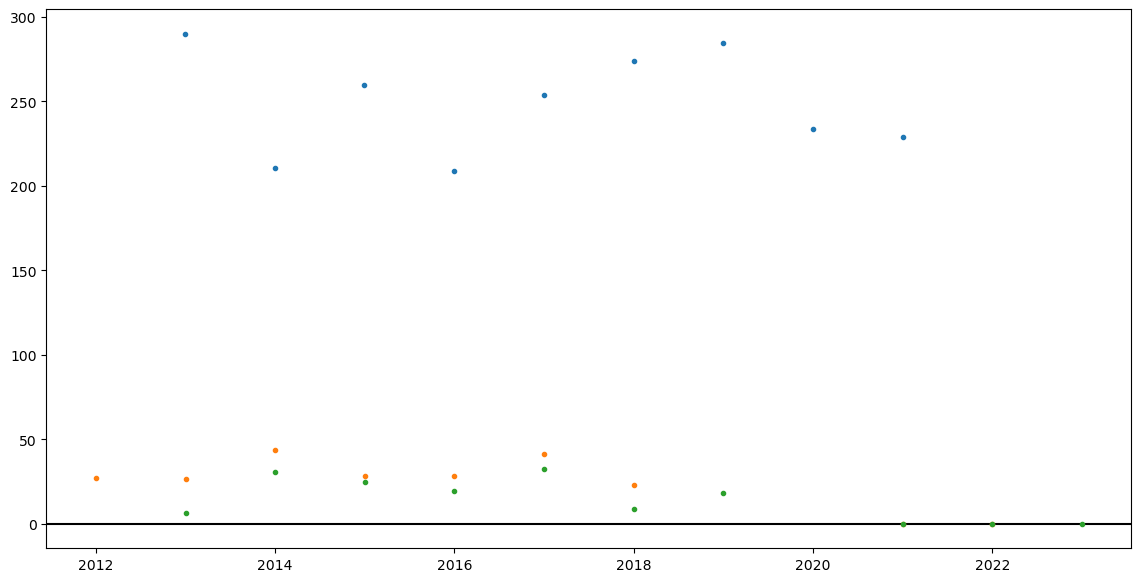

In [13]:
years_array = pd.to_datetime(years_array)
# plot timeseries
fig = plt.subplots(figsize=(14,7))
# plt.plot([2013,2014,2015,2016,2017,2018,2019,2020,2021],annual_sum_FCO2['co2_flux_gapfilled'],'.')
plt.plot(MARTA['tempo'], MARTA['co2'],'.')
plt.axhline(y=0, color='k')
plt.plot(years_array, annual_autumn_df['Autumn Sum'],'.')
plt.plot(years_array, annual_spring_df['Spring Sum'],'.')

In [14]:
df_barplot = pd.DataFrame({
    'Total FCO2': MARTA['co2'],
    'Spring Sum': annual_spring_df['Spring Sum'],
    'Autumn Sum': annual_autumn_df['Autumn Sum']
})

per_FCO2_autumn = df_barplot['Autumn Sum']*100/df_barplot['Total FCO2']
per_FCO2_spring = df_barplot['Spring Sum']*100/df_barplot['Total FCO2']

df_per = pd.DataFrame(per_FCO2_autumn)
df_per['spring'] = per_FCO2_spring

other = df_barplot['Total FCO2']-(df_barplot['Spring Sum'].fillna(0)+df_barplot['Autumn Sum'].fillna(0))

df_barplot = pd.DataFrame({
    'Real Total FCO2': MARTA['co2'],
    'Spring FCO2': annual_spring_df['Spring Sum'],
    'Autumn FCO2': annual_autumn_df['Autumn Sum'],
    'Total FCO2' : other
})
print(df_barplot)

    Real Total FCO2  Spring FCO2  Autumn FCO2  Total FCO2
0               NaN          NaN          NaN         NaN
1               NaN          NaN          NaN         NaN
2            289.97          NaN    26.897154  263.072846
3            210.51     6.209725    26.287581  178.012694
4            259.58    30.656649    43.378018  185.545333
5            209.05    24.544452    28.268579  156.236969
6            253.46    19.586471    28.291088  205.582441
7            274.15    32.193493    41.528443  200.428064
8            284.78     8.520199    22.986049  253.273752
9            233.44    18.279234          NaN  215.160766
10           229.18          NaN          NaN  229.180000
11              NaN     0.000000     0.000000         NaN
12              NaN     0.000000     0.000000         NaN
13              NaN     0.000000          NaN         NaN


In [15]:
print(per_FCO2_autumn)
print(per_FCO2_spring)

0           NaN
1           NaN
2      9.275840
3     12.487569
4     16.710848
5     13.522401
6     11.161954
7     15.148073
8      8.071511
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
dtype: float64
0           NaN
1           NaN
2           NaN
3      2.949848
4     11.810097
5     11.740948
6      7.727638
7     11.743021
8      2.991853
9      7.830378
10          NaN
11          NaN
12          NaN
13          NaN
dtype: float64


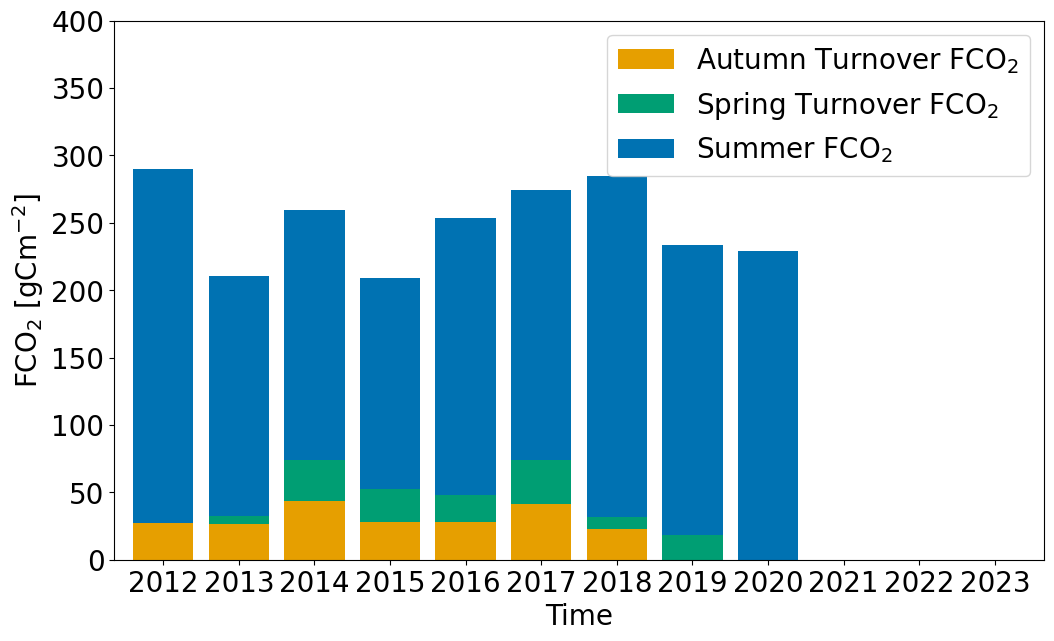

In [16]:
df_barplot_sliced = df_barplot.iloc[2:]
colors_bar = ["#e69f00","#009e73","#0072b2"]
# Create the stacked bar plot
ax = df_barplot_sliced[['Autumn FCO2', 'Spring FCO2', 'Total FCO2']].plot(kind='bar', stacked=True, color=colors_bar, figsize=(12, 7),width=0.8)

# Set labels and title
plt.xlabel('Time', fontsize=20)
plt.ylabel('F$\mathrm{CO_2}$ [gC$\mathrm{m^{-2}}$]', fontsize=20)
plt.ylim([0, 400]) 
# plt.title('Contribution of spring and autumn turnovers to the annual emission of F$\mathrm{CO_2}$', fontsize=20)
plt.xticks(range(len(df_barplot_sliced)), annual_autumn_FCO2.index[2:], rotation=0, fontsize=20)  # Set x-tick labels
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=8)
plt.tick_params (rotation=0, labelsize=20)
plt.legend(['Autumn Turnover F$\mathrm{CO_2}$','Spring Turnover F$\mathrm{CO_2}$', 'Summer F$\mathrm{CO_2}$'],fontsize=20)
plt.savefig('FCO2_contribution_plot_JAK.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# read datatframe
autumn_length = pd.read_csv('Length_autumn.csv',sep=';')
spring_length = pd.read_csv('Length_spring.csv',sep=';')
# create dataframe from file
df_length = pd.DataFrame(autumn_length)
df_spring_length = pd.DataFrame(spring_length)

df_length['spring'] = df_spring_length['Length']

In [18]:
df_per = df_per.rename(columns={0: "autumn"})

In [19]:
print(df_barplot)

    Real Total FCO2  Spring FCO2  Autumn FCO2  Total FCO2
0               NaN          NaN          NaN         NaN
1               NaN          NaN          NaN         NaN
2            289.97          NaN    26.897154  263.072846
3            210.51     6.209725    26.287581  178.012694
4            259.58    30.656649    43.378018  185.545333
5            209.05    24.544452    28.268579  156.236969
6            253.46    19.586471    28.291088  205.582441
7            274.15    32.193493    41.528443  200.428064
8            284.78     8.520199    22.986049  253.273752
9            233.44    18.279234          NaN  215.160766
10           229.18          NaN          NaN  229.180000
11              NaN     0.000000     0.000000         NaN
12              NaN     0.000000     0.000000         NaN
13              NaN     0.000000          NaN         NaN


In [20]:
print(df_length)

    Year  autumn  spring
0   2010     NaN     NaN
1   2011     NaN     NaN
2   2012    53.0     NaN
3   2013    44.0    11.0
4   2014    64.0    51.0
5   2015    56.0    28.0
6   2016    53.0    25.0
7   2017    72.0    51.0
8   2018    53.0    14.0
9   2019     NaN    19.0
10  2020     NaN     NaN
11  2021    60.0    22.0
12  2022    47.0    12.0
13  2023     NaN    16.0


In [21]:
#*
df_barplot.replace(0, np.nan, inplace=True)
df_length_sliced_a = df_length.drop(index=[3,4,7,11])
df_barplot_sliced_a = df_barplot.drop(index=[3,4,7,11])

mask = ~np.isnan(df_length_sliced_a['autumn']) & ~np.isnan(df_barplot_sliced_a['Autumn FCO2'])
x_clean_a = df_length_sliced_a['autumn'][mask]
y_clean_a = df_barplot_sliced_a['Autumn FCO2'][mask]

slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_clean_a,y_clean_a)
r_squared_a = r_value_a**2
print(r_squared_a)
print(p_value_a)
print(slope_a)

0.1950080474878174
0.5584028447919787
0.7368272765914605


In [22]:
print(x_clean_a,y_clean_a)

2    53.0
5    56.0
6    53.0
8    53.0
Name: autumn, dtype: float64 2    26.897154
5    28.268579
6    28.291088
8    22.986049
Name: Autumn FCO2, dtype: float64


In [23]:
df_barplot.replace(0, np.nan, inplace=True)
df_length_sliced = df_length.drop(index=[4,7])
df_barplot_sliced = df_barplot.drop(index=[4,7])

mask = ~np.isnan(df_length_sliced['spring']) & ~np.isnan(df_barplot_sliced['Spring FCO2'])
x_clean_s = df_length_sliced['spring'][mask]
y_clean_s = df_barplot_sliced['Spring FCO2'][mask]

slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(x_clean_s,y_clean_s)
r_squared_s = r_value_s**2
print(r_squared_s)
print(p_value_s)
print(slope_s)

0.9363140676312037
0.006956056458239596
1.0491426196305533


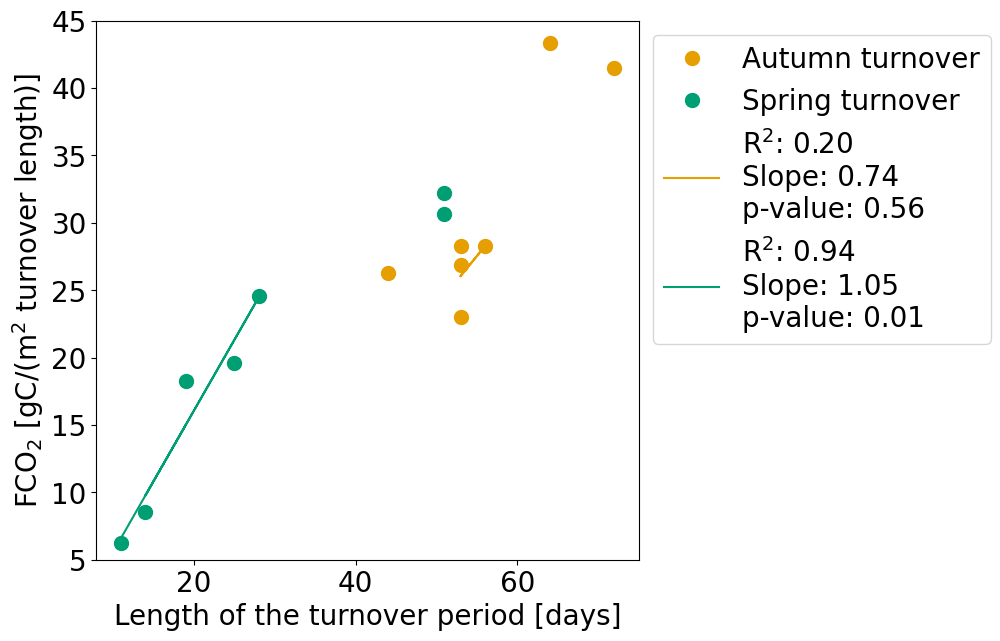

In [24]:
# plot timeseries
fig = plt.subplots(figsize=(7,7))
plt.plot(df_length['autumn'],df_barplot['Autumn FCO2'],'.',color="#e69f00",markersize=20)
plt.plot(df_length['spring'],df_barplot['Spring FCO2'],'.',color="#009e73",markersize=20)
plt.ylim([5,45])

plt.plot(x_clean_a, intercept_a + slope_a * x_clean_a, color="#e69f00", label='Correlation Line Autumn')
plt.plot(x_clean_s, intercept_s + slope_s * x_clean_s, color="#009e73", label='Correlation Line Spring')

plt.tick_params (rotation=0, labelsize=20)
plt.legend([
    'Autumn turnover',
    'Spring turnover',
    f'$\mathrm{{R^2}}$: {r_squared_a:.2f} \nSlope: {slope_a:.2f} \np-value: {p_value_a:.2f}',
    f'$\mathrm{{R^2}}$: {r_squared_s:.2f} \nSlope: {slope_s:.2f} \np-value: {p_value_s:.2f}'
], fontsize=20, loc="upper left", bbox_to_anchor=(1, 1))# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Length of the turnover period [days]', fontsize=20)
plt.ylabel('F$\mathrm{CO_2}$ [gC/($\mathrm{m^{2}}$ turnover length)]', fontsize=20)
# plt.title('Length of turnover period vs cumulative F$\mathrm{CO_2}$', fontsize=20)
plt.savefig('Lenght_vs_FCO2_turnover_JAK.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print(df_length['autumn'],df_barplot['Autumn FCO2'])

0      NaN
1      NaN
2     53.0
3     44.0
4     64.0
5     56.0
6     53.0
7     72.0
8     53.0
9      NaN
10     NaN
11    60.0
12    47.0
13     NaN
Name: autumn, dtype: float64 0           NaN
1           NaN
2     26.897154
3     26.287581
4     43.378018
5     28.268579
6     28.291088
7     41.528443
8     22.986049
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
Name: Autumn FCO2, dtype: float64
